In [ ]:
from types import GeneratorType
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

: 

In [4]:
denver = pd.read_csv('https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_denver/dwellings_denver.csv')
ml = pd.read_csv('https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_ml/dwellings_ml.csv')

In [5]:
#denver.head()
denver.arcstyle.unique()

array(['MIDDLE UNIT', 'END UNIT', 'TWO-STORY', 'ONE-STORY', 'BI-LEVEL',
       'THREE-STORY', 'ONE AND HALF-STORY', 'TWO AND HALF-STORY',
       'TRI-LEVEL', 'TRI-LEVEL WITH BASEMENT', 'SPLIT LEVEL',
       'CONVERSIONS'], dtype=object)

In [6]:
denver['before1980'] = denver.yrbuilt <= 1980
denver.head()

parcel  nbhd  abstrprd  livearea  finbsmnt  basement  yrbuilt  \
0  00102-08-065-065     4      1130      1346         0         0     2004   
1  00102-08-073-073     4      1130      1249         0         0     2005   
2  00102-08-078-078     4      1130      1346         0         0     2005   
3  00102-08-081-081     4      1130      1146         0         0     2005   
4  00102-08-086-086     4      1130      1249         0         0     2005   

  condition quality  totunits  ...     arcstyle  sprice  deduct  netprice  \
0       AVG       C         1  ...  MIDDLE UNIT  100000       0    100000   
1       AVG       C         1  ...     END UNIT   94700       0     94700   
2       AVG       C         1  ...  MIDDLE UNIT   89500       0     89500   
3       AVG       C         1  ...     END UNIT   92000    3220     88780   
4       AVG       C         1  ...     END UNIT   74199       0     74199   

     tasp  smonth  syear qualified  status  before1980  
0  100000       2   2012         Q       I       False  
1   94700       4   2011         Q       I       False  
2   89500      10   2010         Q       I       False  
3   88780      10   2011         Q       I       False  
4   74199       3   2012         U       I       False  

[5 rows x 27 columns]

In [7]:
subset_data = denver.sample(n= 4999)
chart = alt.Chart(subset_data).mark_boxplot().encode(
    x= alt.X('arcstyle'),
    y= alt.Y('yrbuilt', scale=alt.Scale(domain=(1850,2050)))
)
chart

alt.Chart(...)

livearea  finbsmnt  basement    nocars   numbdrm  numbaths  \
livearea  1.000000  0.332351  0.558436  0.566141  0.662261  0.817210   
finbsmnt  0.332351  1.000000  0.790815  0.380552  0.229379  0.473859   
basement  0.558436  0.790815  1.000000  0.550396  0.368753  0.594356   
nocars    0.566141  0.380552  0.550396  1.000000  0.508742  0.602889   
numbdrm   0.662261  0.229379  0.368753  0.508742  1.000000  0.616557   
numbaths  0.817210  0.473859  0.594356  0.602889  0.616557  1.000000   
stories   0.556306  0.023699  0.182519  0.393839  0.454919  0.589210   
yrbuilt   0.297498 -0.021416  0.052264  0.146564 -0.027645  0.357533   

           stories   yrbuilt  
livearea  0.556306  0.297498  
finbsmnt  0.023699 -0.021416  
basement  0.182519  0.052264  
nocars    0.393839  0.146564  
numbdrm   0.454919 -0.027645  
numbaths  0.589210  0.357533  
stories   1.000000  0.302795  
yrbuilt   0.302795  1.000000

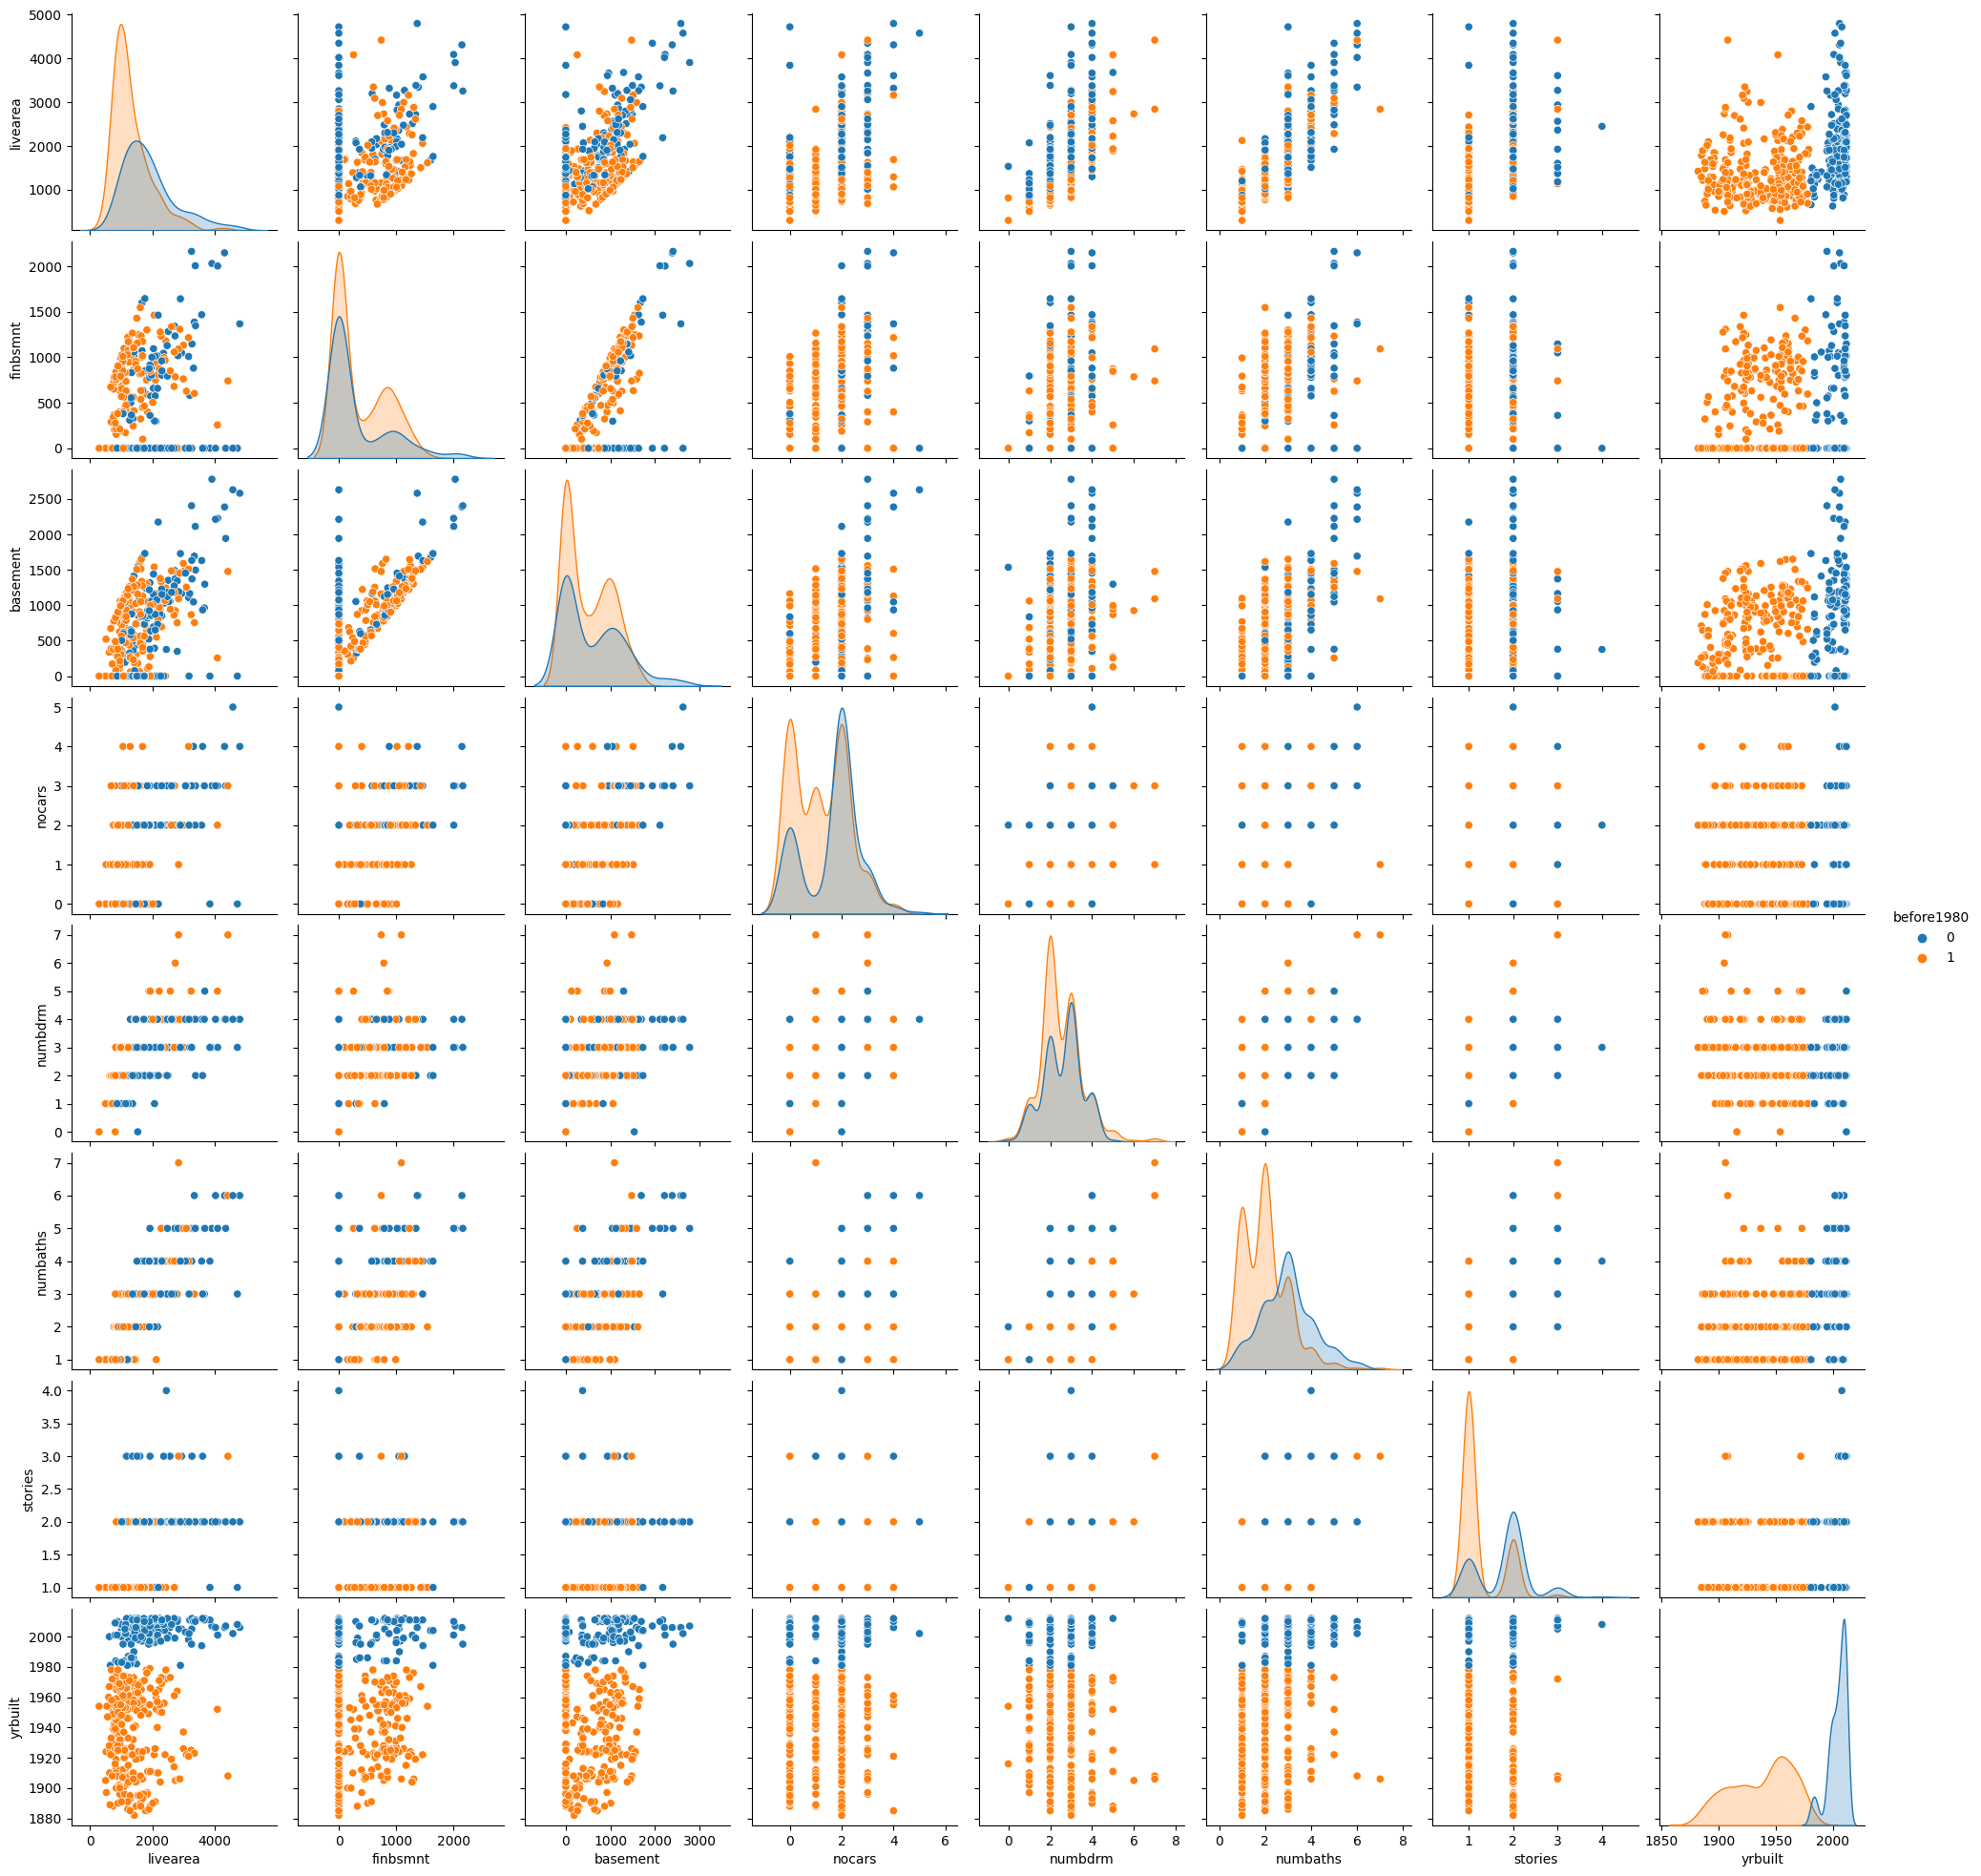

In [8]:
h_subset = ml.filter(['livearea', 'finbsmnt', 
    'basement', 'yearbuilt', 'nocars', 'numbdrm', 'numbaths', 
    'stories', 'yrbuilt', 'before1980']).sample(500)

sns.pairplot(h_subset, hue = 'before1980')

corr = h_subset.drop(columns = 'before1980').corr()
corr

<Axes: >

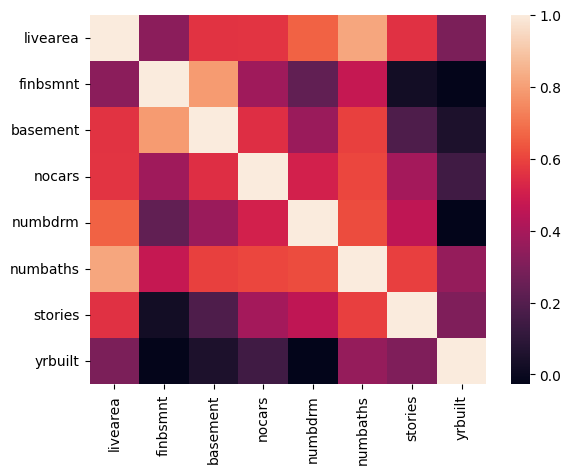

In [9]:
sns.heatmap(corr)

In [10]:
#testing different columns to look at how they collilate with the columns
#num baths
denver.columns
alt.Chart(subset_data).mark_boxplot().encode(

    x= alt.X('numbaths'),
    y= alt.Y('yrbuilt', scale=alt.Scale(domain=(1850,2050)))
)

alt.Chart(...)

In [11]:
x = ml.filter(["numbaths",'stories','livearea', 'gartype_None', 'gartype_Att', 'arcstyle_BI-LEVEL'])
y = ml.before1980
feature_names = x.columns

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 192)


In [13]:
x_train.head()


numbaths  stories  livearea  gartype_None  gartype_Att  \
20591         3        2      2200             0            1   
7867          2        1      1118             0            0   
14186         2        2      1468             0            0   
9633          2        1      1041             1            0   
12520         1        1       718             1            0   

       arcstyle_BI-LEVEL  
20591                  0  
7867                   0  
14186                  0  
9633                   0  
12520                  0

In [14]:
# create the model
classifier = RandomForestClassifier()

# train the model
classifier.fit(x_train, y_train)

# make predictions
y_predictions = classifier.predict(x_test)
y_predictions

array([1, 1, 0, ..., 1, 0, 0])

In [15]:
# test how accurate predictions are
metrics.accuracy_score(y_test, y_predictions)

0.8502356432187118

In [16]:
#more test analysis
importances = classifier.feature_importances_
importances_df = pd.DataFrame({'Features' : feature_names, 'Importances': importances})
importances_df.head()
alt.Chart(importances_df).mark_bar().encode(
    x= alt.X('Features'),
    y= alt.Y('Importances')
)

alt.Chart(...)